# Task# 3 - To Explore Unsupervised Machine Learning

A definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”.

Clustering is crucial because it determines the intrinsic grouping among the present unlabeled data. They make some assumptions about data points to constitute their similarity. Each hypothesis will construct different but equally valid clusters.

# K_Means Clustering

K-means clustering is a type of unsupervised learning, which is used with unlabeled dataset. The goal of this algorithm is to find K groups in the data. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

The centroids of the K clusters, which can be used to label new data
Labels for the training data (each data point is assigned to a single cluster)
K-means works by defining spherical clusters that are separable in a way so that the mean value converges towards the cluster center. 

### Algorithm

STEP 1 : Select the number of clusters  k  that you think is the optimal number.  
STEP 2 : Initialize  k  points as "centroids" randomly within the space of our data.  
STEP 3 : Attribute each observation to its closest centroid.  
STEP 4 : Update the centroids to the center of all the attributed set of observations.  
STEP 5 : Repeat steps 3 and 4 a fixed number of times or until all of the centroids are stable(i.e. no longer change in step4).

Now after reading this algorithm you must be thinking <u>how do I select the number of clusters k</u> and <u>if the initialization of clusters centroid is not appropriate wouldn't it lead the K-Means to give an arbitrarily bad clusters</u>. 

1. To select the number of clusters k there's this <b>elbow curve</b> and <b>Silhouette score</b> method 

>Elbow curve method is basically a graph method ,where  the x-axis will represent the number of clusters and the y-axis will be an evaluation metric-inertia(inertia calculates the sum of distances of all the points within a cluster from the centroid of that cluster)

> Silhouette score is a way to measure how close each point in a cluster is to the points in its neighboring clusters. Its a neat way to find out the optimum value for k during k-means clustering. It is calculated for each instance and the formula goes like this:  
<b>Silhouette Coefficient = (x-y)/ max(x,y)</b>  
where, y is the mean intra cluster distance and x depicts mean nearest cluster distance.

<b>Note</b> - We will be using both of these methods later in this week which help you understand them better

2. To correctly initialize the centroid of clusters, we have K-Means++ .It specifies a procedure to initialize the cluster centers before moving forward with the standard k-means clustering algorithm.  

### Okay now let's move on to some implementation part

#### First we will be performing clustering on a smaller dataset


#### Importings

Importing all the necessary libraries

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
#%matplotlib notebook

#### Data exploration

In [29]:
dataset = pd.read_csv('C:/Users/lavis/Downloads/Iris.csv',index_col=0)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
dataset.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [32]:
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Data visulaization

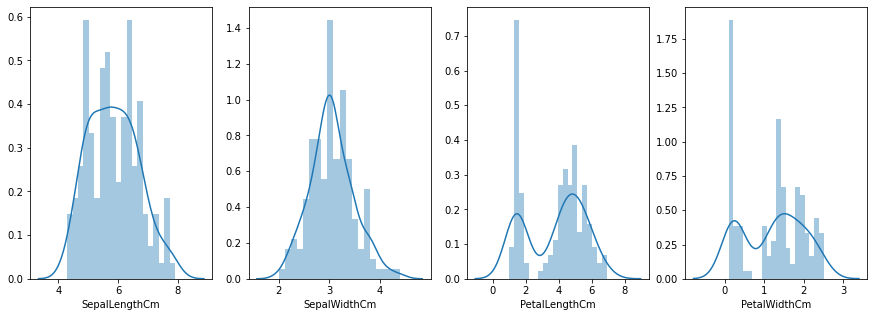

In [33]:
plt.figure(figsize=(15,5))
n=0
for x in ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']:
    n+=1
    plt.subplot(1,4,n)
    sns.distplot(dataset[x] , bins = 20)
plt.show()

#### Let's apply clustering

First we will be applying clustering on the basis of Annual Income (k$)	 and Spending Score.


In [34]:
x = dataset.iloc[:, :-1].values

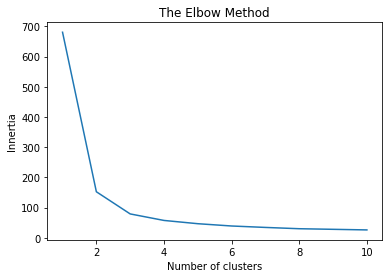

In [35]:
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,11),inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Innertia')
plt.show()

Here we have used the <b>elbow method</b> to find the suitable number of clusters.

Now, from this graph we choose the cluster value where this decrease in inertia value becomes constant that value can be chosen as the right cluster value for our data.

So from this graph we see that 3 is the point where the curve changes drastically , it starts to become constant.

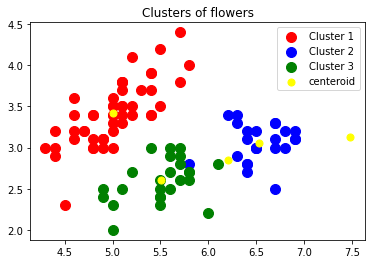

In [36]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow' , label = 'centeroid')
plt.title('Clusters of flowers')
plt.legend()
plt.show()

# Hierarchical Clustering

Now we are going to see Hierarchical Clustering .  
This type of clustering basically works on the basis of minimize the distance only i.e it is a distance based clustering method.

Hierarchical clustering starts by assigning all data points as their own cluster. As the name suggests it builds the hierarchy and in the next step, it combines the two nearest data point and merges it together to one cluster.

<b>Agglomerative Hierarchical Clustering</b> - In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster 

#### Agglomerative Hierarchical Clustering algorithm

Step 1 : Assign each data point to its own cluster.  
Step 2 : Find closest pair of cluster using euclidean distance and merge them in to single cluster.  
Step 3 : Calculate distance between two nearest clusters and combine until all items are clustered in to a single cluster.

#### Importings

Importing all the necessary libraries

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering

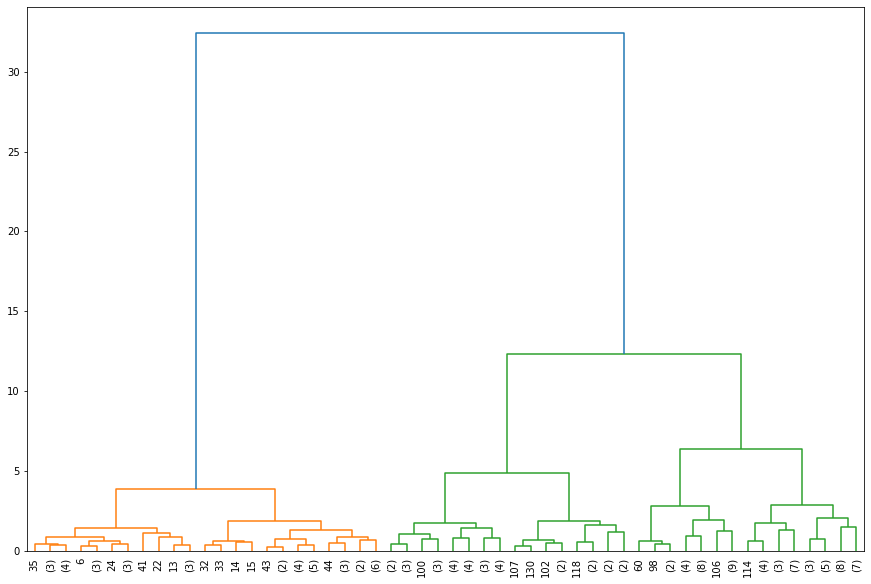

In [38]:
Z=linkage(x,method="ward")
plt.figure(figsize=(15,10))
dendrogram(Z,leaf_rotation=90,p=5,color_threshold=20,leaf_font_size=10,truncate_mode='level')
plt.show()

In [43]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hc.fit(x)

AgglomerativeClustering(n_clusters=3)

In [44]:
hc.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [45]:
y_kmeans = hc.fit_predict(x)

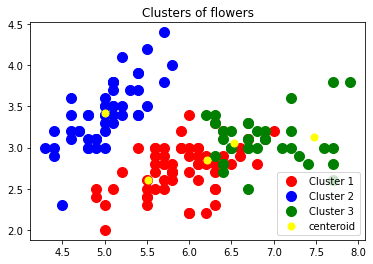

In [46]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow' , label = 'centeroid')
plt.title('Clusters of flowers')
plt.legend()
plt.show()